# **Day - 50 : End-to-End Classification Challenge**

*1.*

*Import the Cardiovascular Study Dataset using pandas. Use the pandas head() method to check that you data has loaded properly.* 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

In [2]:
df = pd.read_csv('Data/cardiovascular_dataset.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
# a. Check the shape of your dataset (columns and rows)

df.shape

(3390, 17)

In [4]:
# b. Check for data types in the DataFrame.

df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
# c. Is there any missing data in the DataFrame?
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [6]:
df.TenYearCHD.value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [7]:
# d. What is the minimum and maximum age in the dataset. Create a histogram plot of the age column.

min_age = df.age.min()
print(f'The minimum age is: {min_age}')

The minimum age is: 32


In [8]:
max_age = df.age.max()
print(f'The maximun age is: {max_age}')

The maximun age is: 70


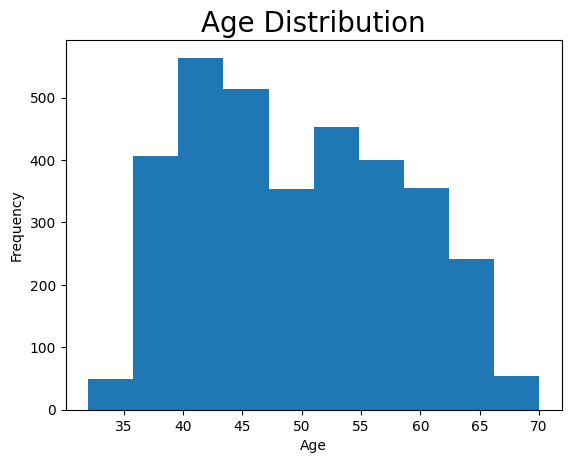

In [9]:
df["age"].plot(kind="hist")
plt.xlabel(xlabel="Age")
plt.title("Age Distribution", fontsize = 20)
plt.show()

In [10]:
# e. Identify the target column. Compare the value count of ones and zeros in the column. Plot this on a bar plot.

df.TenYearCHD.value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

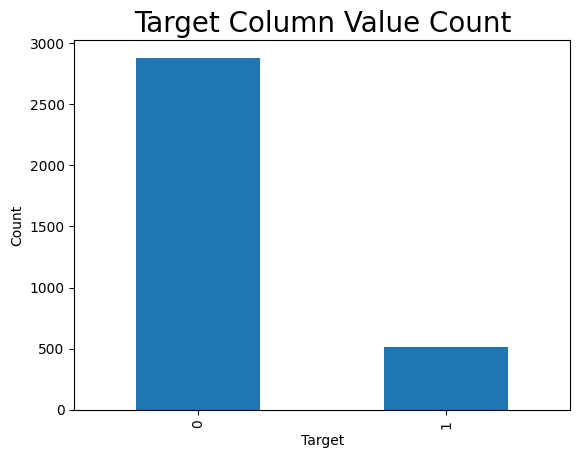

In [11]:
df.TenYearCHD.value_counts().plot(kind= "bar")
plt.title("Target Column Value Count", fontsize = 20)
plt.xlabel(xlabel= "Target")
plt.ylabel(ylabel= "Count")
plt.show()

*2.*

*Now, create a copy of the DataFrame. Clean the data by dropping all the rows that have null values. Write a code to confirm that the null values have been dropped.* 

In [12]:
df_2 = df.copy()

In [13]:
df_2 = df_2.dropna(axis=0)

df_2.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

*3.*

*Exploratory data analysis is important to ensure that we understand our data. Using the pandas quantile() method, count the number of outliers in each column with numeric datatype. Using boxplot, create a plot to visualize these outliers in the data. Your plot should only include columns with outliers.* 

In [14]:
numeric_dtype_columns = []
for column, values in df_2.items():
    if values.dtypes != "object":
        numeric_dtype_columns.append(column)

def count_outliers_in_columns(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df[columns] < (Q1 - 1.5*IQR)) | (df[columns] > 
                                                     (Q3 + 1.5*IQR)))]
    return outliers[columns].count()

count_outliers_in_columns(df_2, numeric_dtype_columns)

id                   0
age                  0
education            0
cigsPerDay           7
BPMeds              88
prevalentStroke     18
prevalentHyp         0
diabetes            79
totChol             34
sysBP               90
diaBP               50
BMI                 72
heartRate           56
glucose            146
TenYearCHD         444
dtype: int64

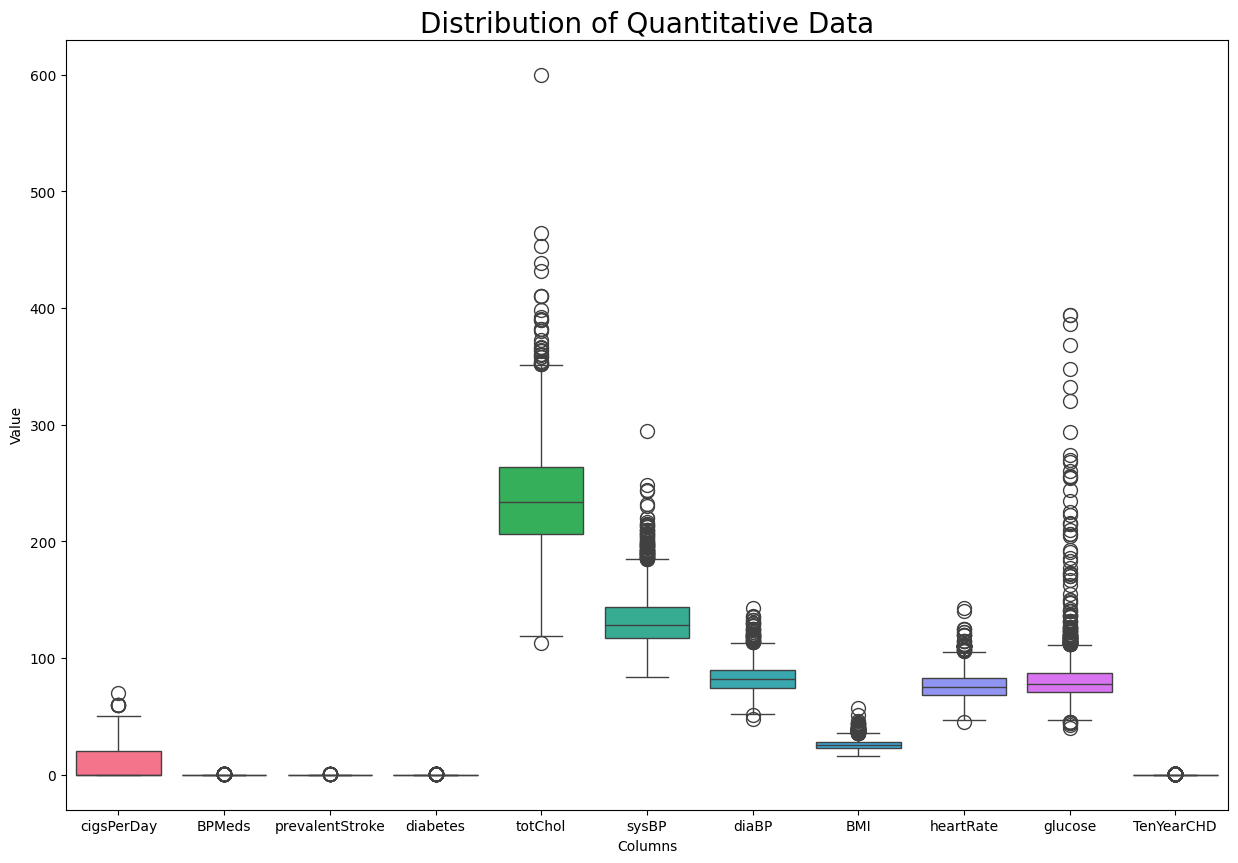

In [15]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=df_2.drop(columns=(['id','age','education','prevalentHyp', 
                                     'sex', 
                                 'is_smoking']), inplace= False),
            saturation=0.95,
            fliersize=10,
            whis=1.5,
            width=0.8)

plt.xlabel(xlabel= "Columns")
plt.ylabel(ylabel = "Value")
plt.title("Distribution of Quantitative Data", fontsize= 20)
plt.show()

*4.*

*You have decided to drop the outliers in the BMI column. Check the shape of the DataFrame before and after dropping outliers.* 

In [16]:
df_2.shape

(2927, 17)

In [17]:
Q1 = df_2.BMI.quantile(0.25)
Q3 = df_2.BMI.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_2 = df_2[(df_2.BMI > lower_bound) & (df_2.BMI < upper_bound)]
df_2.shape

(2855, 17)

*5.*

*You want to know the correlation between the people that smoke and risk of heart disease. Using crosstab, compare the "is_smoking" column to the "TenYearCHD" column. Is there a link between smoking and heart disease?* 

In [18]:

pd.crosstab(df_2.is_smoking, df.TenYearCHD)

TenYearCHD,0,1
is_smoking,,
NO,1236,198
YES,1192,229


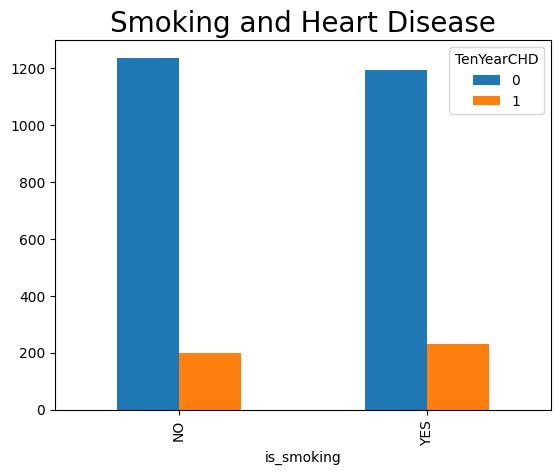

In [19]:
pd.crosstab(df_2.is_smoking, df.TenYearCHD).plot(kind="bar")
plt.title("Smoking and Heart Disease", fontsize = 20)
plt.show()

*6.*

*How many females and males are in the dataset? Do a crosstab of the "sex" column and the target column (TenYearCHD) to find a relationship between gender and heart disease.* 

In [20]:
df_2.sex.value_counts()

sex
F    1561
M    1294
Name: count, dtype: int64

In [21]:
pd.crosstab(df_2.sex, df_2.TenYearCHD)

TenYearCHD,0,1
sex,,
F,1374,187
M,1054,240


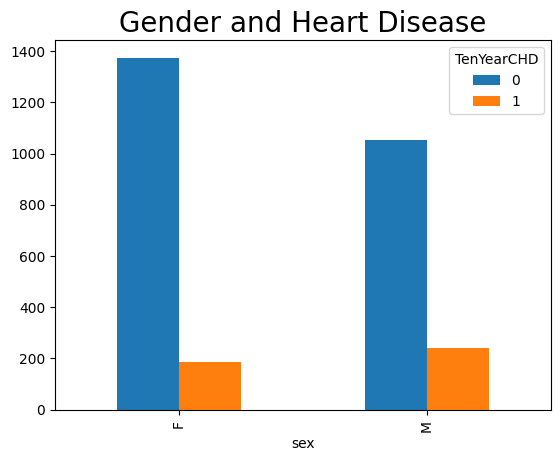

In [22]:
pd.crosstab(df_2.sex, df_2.TenYearCHD).plot(kind='bar')
plt.title("Gender and Heart Disease", fontsize = 20)
plt.show()

*7.*

*Is there a link between a person’s cholesterol levels, their age, and heart disease? To answer this question, plot a scatter plot of the "totChol" column and the age column for people that have heart disease in the TenYearCHD column (remember that 1 is for heart disease and 0 is for non-heart disease).* 

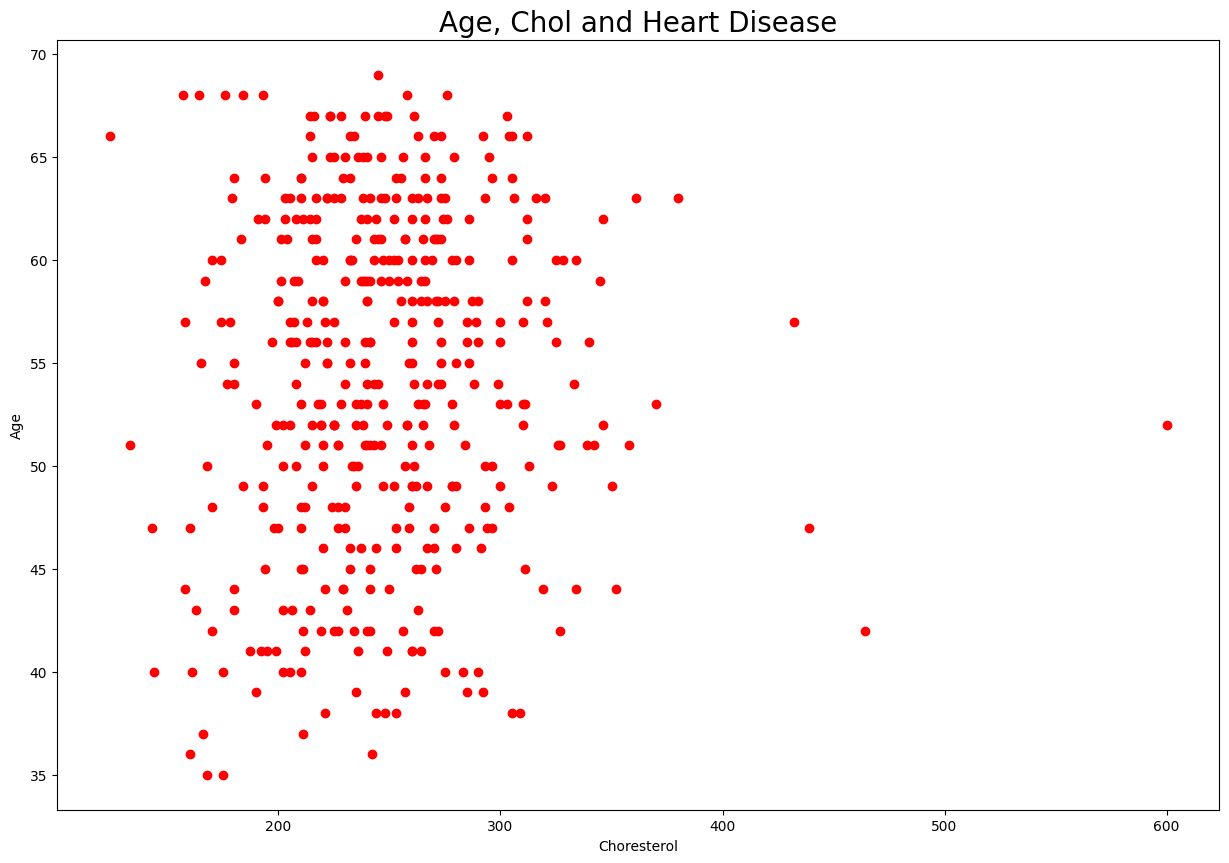

In [23]:
plt.subplots(figsize=(15,10))
plt.scatter(df_2.totChol[df_2.TenYearCHD==1],
            df_2.age[df.TenYearCHD==1], c= "red")
    
    

plt.xlabel(xlabel ="Choresterol")
plt.ylabel(ylabel ="Age")
plt.title("Age, Chol and Heart Disease", fontsize= 20)
plt.show()

*8.*

*Is there a link between heart rate, age and risk of heart disease? To answer this question, plot a scatter plot.* 

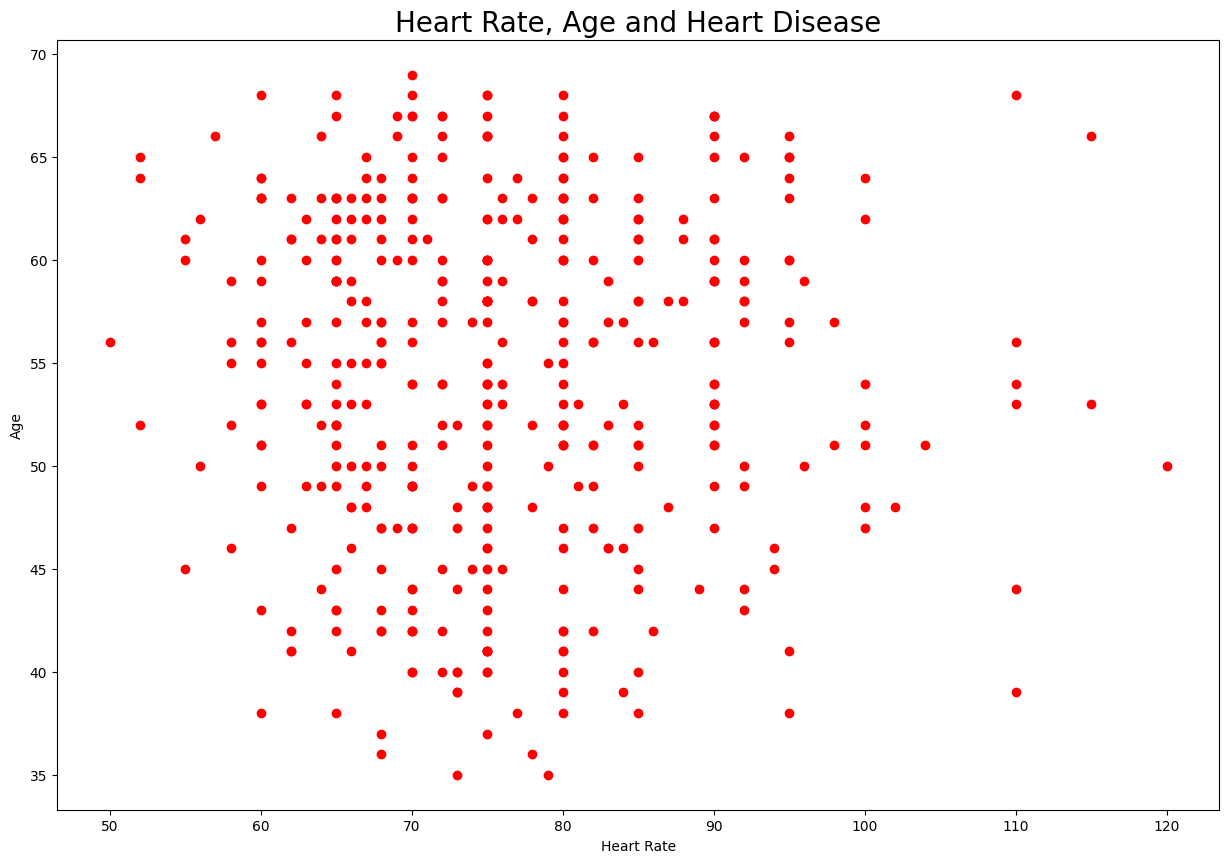

In [24]:
plt.subplots(figsize=(15,10))
plt.scatter(df_2.heartRate[df_2.TenYearCHD==1],
            df_2.age[df_2.TenYearCHD==1], c= "red")


plt.xlabel(xlabel ="Heart Rate")
plt.ylabel(ylabel ="Age")
plt.title("Heart Rate, Age and Heart Disease", fontsize = 20)
plt.show()

*9.*

*Let’s consider the social aspect: is there a link between a person’s level of education and heart disease? Plot a bar graph comparing the number of people with heart disease to those without heart disease at all levels of education. Try using a crosstab.* 

In [25]:
pd.crosstab(df_2.education, df_2.TenYearCHD)

TenYearCHD,0,1
education,,
1.0,971,216
2.0,756,107
3.0,424,60
4.0,277,44


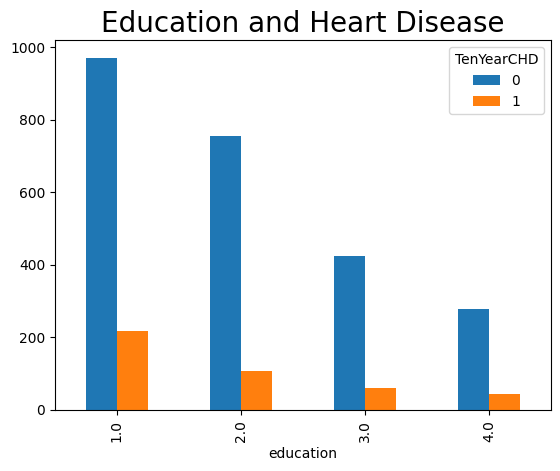

In [26]:
pd.crosstab(df_2.education, df_2.TenYearCHD).plot(kind='bar')
plt.title("Education and Heart Disease", fontsize = 20)
plt.show()

*10.*

*Using the scikit-learn LabelEncoder, transform the non-numeric columns into numeric. To further understand the relationship between variables, create a heatmap using Seaborn.* 

In [27]:
le = LabelEncoder()
df_2['sex'] = le.fit_transform(df_2['sex'])
df_2['is_smoking'] = le.fit_transform(df_2['is_smoking'])
df_2.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


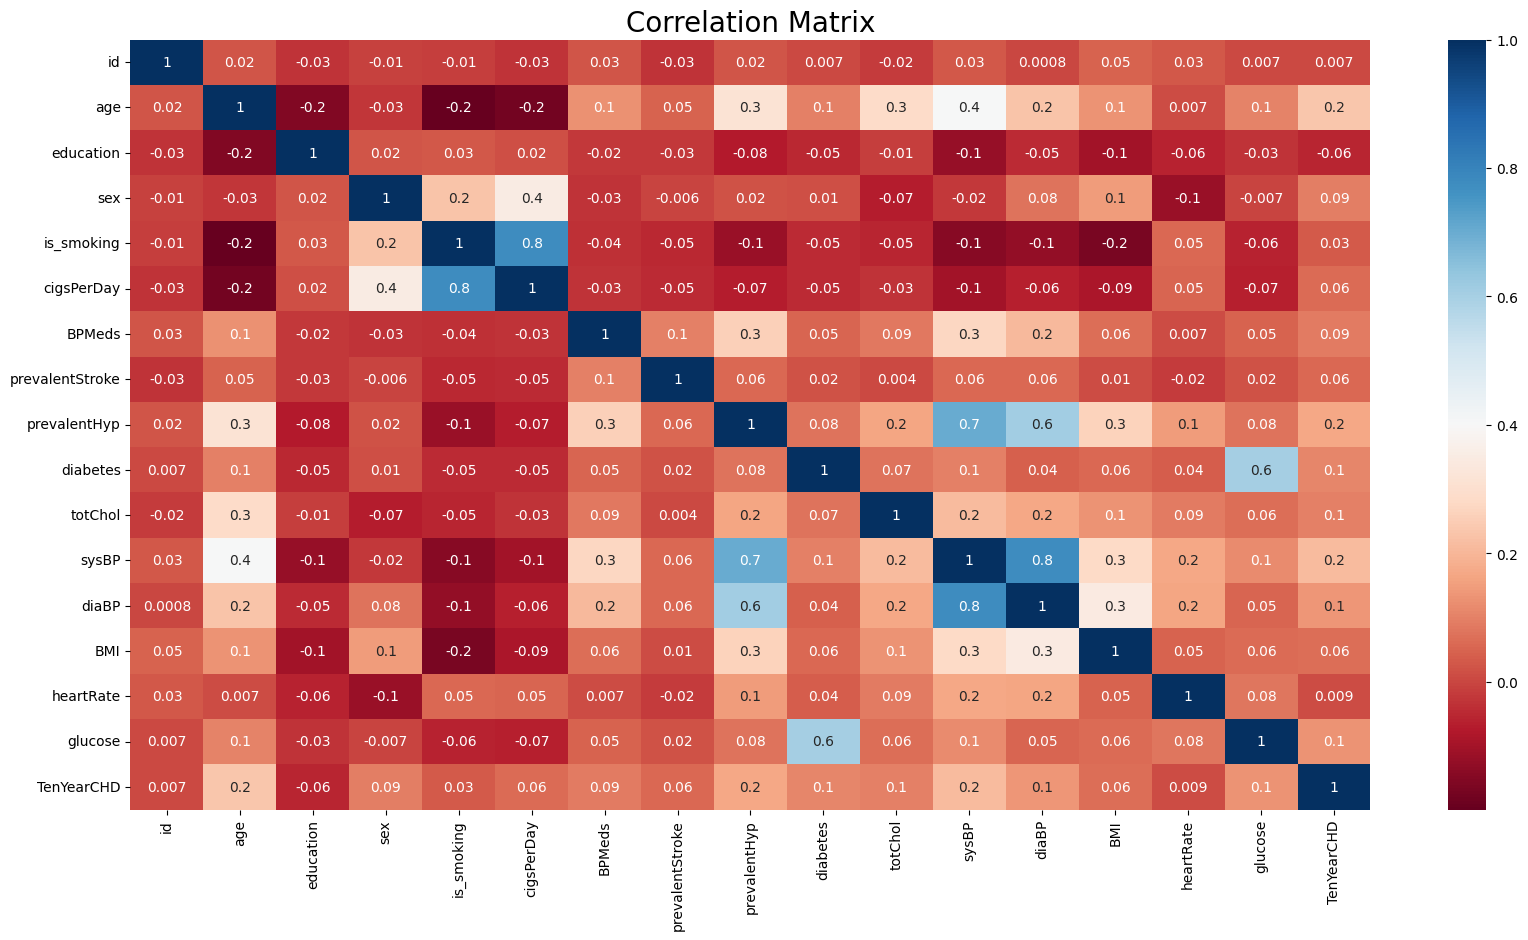

In [28]:
corr = df_2.corr()

plt.subplots(figsize=(20,10))
sns.heatmap(corr, 
            annot=True, 
            cmap="RdBu",
           fmt='.0g',
            vmax=1, 
            )
plt.title("Correlation Matrix",fontsize = 20)
plt.show()

*11.*

*Separate the DataFrame into x values and y value. The y value will be the target column. The target column is TenYearCHD. The variables will be the remainder of the channels.* 

In [29]:
y = df_2["TenYearCHD"]

X = df_2.drop(columns=["TenYearCHD", "id"])

In [30]:
X.shape, y.shape

((2855, 15), (2855,))

In [31]:
X.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0


*12.*

*Split the data into training and testing sets. 20% of the data will be testing data. Scale the data using StandardScaler from Scikit-learn library. You will then use logistic regression model to train the model. Test the accuracy of the model on the testing sets.* 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = LogisticRegression()
clf.fit(X_train, y_train)

score_on_test_data = clf.score(X_test, y_test)

print(f'Test data accuracy: {score_on_test_data*100:.2f}%')

Test data accuracy: 85.81%


*13.*

*Now that we have our accuracy score on the test data, try hyperparameter tuning the logistic regression model using RandomizedSearchCV. Hyperparameter tuning is simply searching for the best combination of parameters for the best performance of the machine learning model. Use the best parameters obtained by RandomizedSearchCV to instantiate a logistic regression model and fit the training data. What is the accuracy score?* 

In [34]:
distributions = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'max_iter' : range(100, 800),
    'warm_start' : [True, False],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag'],
    'C' : np.logspace(-1, 1, 22)
}

clf = RandomizedSearchCV(estimator = LogisticRegression(),
                                   param_distributions = distributions,
                                   n_iter = 100,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 42)

clf.fit(X_train, y_train)

best_params = clf.best_params_

clf_best_dt = LogisticRegression(**best_params)

clf_best_dt.fit(X_train, y_train)
accuracy_score = clf_best_dt.score(X_test, y_test)

print(f'Test data accuracy: {accuracy_score*100:.2f}%')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Test data accuracy: 85.99%


*14.*

*Above, you have evaluated the results using the accuracy score. The accuracy score does not give a complete picture of the performance of our model. We need to use other methods to evaluate or model.* 

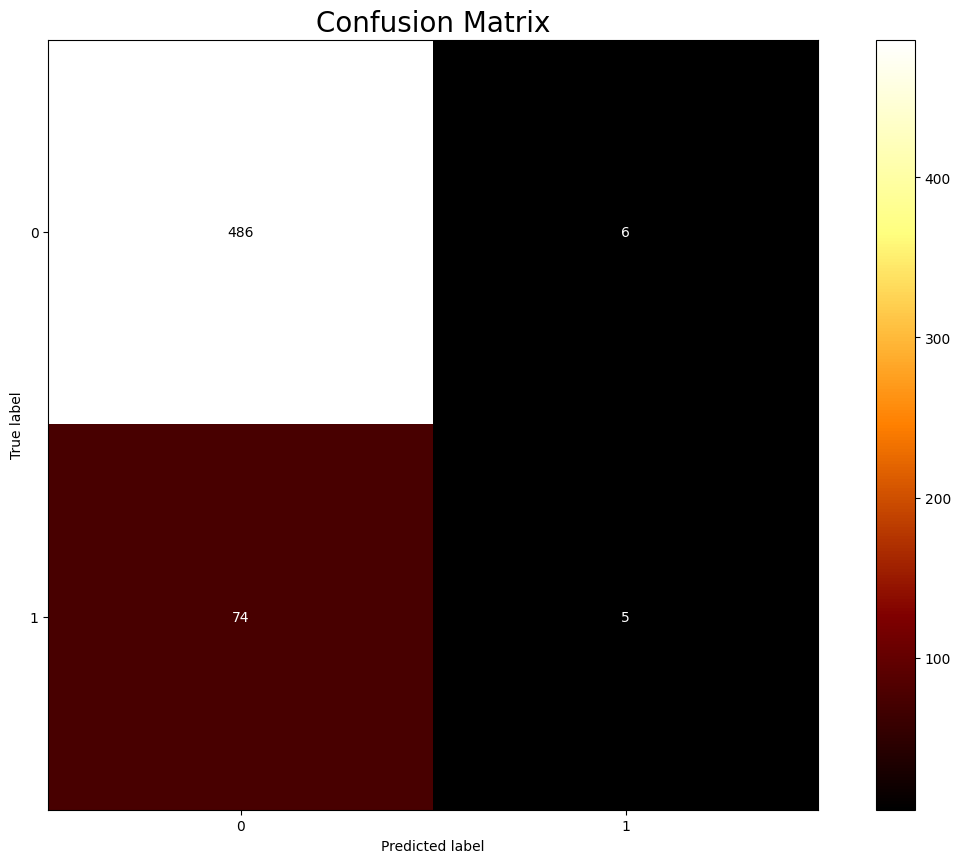

In [35]:
# a. Use the confusion_matrix to obtain an understanding of what the model is predicting right and what it is predicting wrong in the test data.

y_pred = clf_best_dt.predict(X_test)


disp = ConfusionMatrixDisplay.from_predictions( y_test, y_pred,
                                               cmap=plt.cm.afmhot,
                       display_labels = clf_best_dt.classes_)

fig = disp.ax_.get_figure() 
fig.set_figwidth(15)
fig.set_figheight(10)
plt.title("Confusion Matrix", fontsize=20)
plt.show()



In [36]:
# b. Generate a ROC curve plot for the results. Use the predict_proba() method to calculate the AUC. What is the significance of the Roc curve?

y_predict = clf_best_dt.predict_proba(X_test)[:,1]

auc_score = roc_auc_score(y_test, y_predict)
print(f'Auc score: {auc_score:.2f}')

Auc score: 0.73


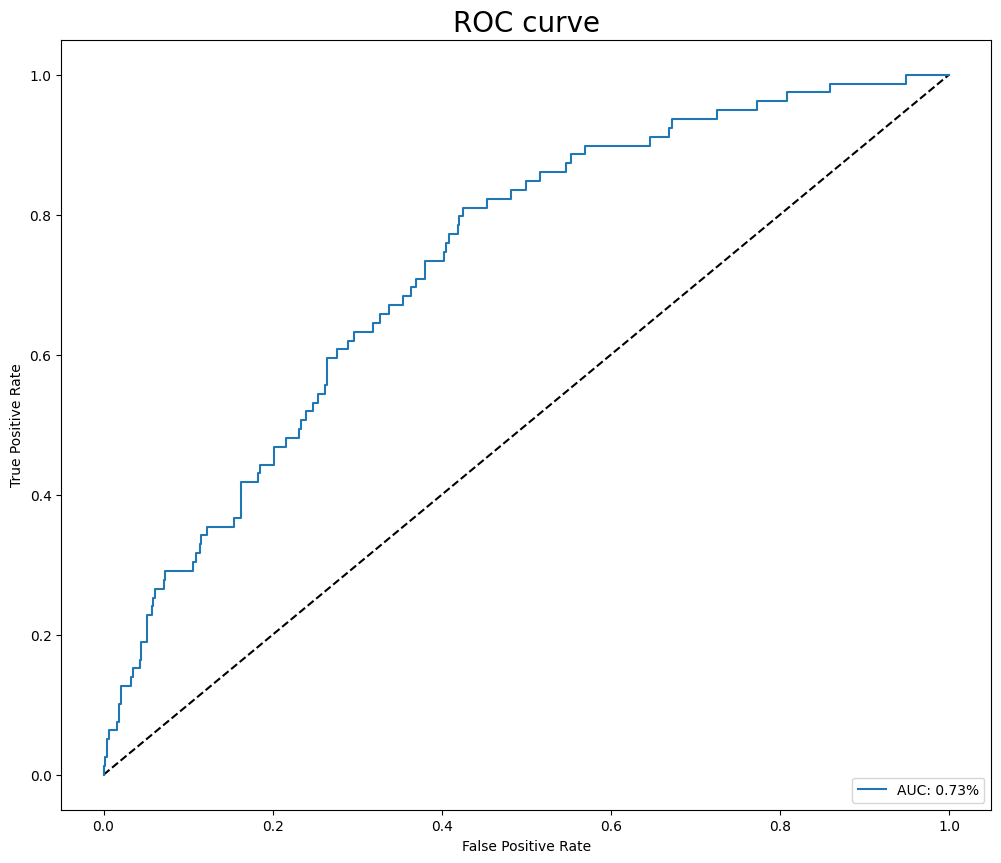

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.figure(figsize=(12,10))
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr, label=f'AUC: {auc_score:.2f}%')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve', fontsize= 20)
plt.legend(loc ='lower right')
plt.show()

In [38]:
# c. Generate the classification report. The classification report will evaluate the following matrices: precision, recall, and F1-score. What do you mean by each of these metrics? Using this report, can you conclude if there is a data imbalance in the dataset?


names = ['No Risk of Heart Disease', 'Risk of Heart Disease']
print(classification_report(y_test, y_pred, target_names=names))

                          precision    recall  f1-score   support

No Risk of Heart Disease       0.87      0.99      0.92       492
   Risk of Heart Disease       0.45      0.06      0.11        79

                accuracy                           0.86       571
               macro avg       0.66      0.53      0.52       571
            weighted avg       0.81      0.86      0.81       571



*16.*

*Save  the  model  you  trained  above  (question  13).  Save  the model using the pickle library. After saving the model, load it.* 

In [39]:
with open('model.pkl', 'wb') as file:
    pickle.dump(clf_best_dt, file)

In [40]:
saved_model = pickle.load(open('model.pkl', 'rb'))
score = saved_model.score(X_test, y_test)
score

0.8598949211908932